# 7. 학습된 모델을 현장 탄성파 자료에 적용

In [1]:
import numpy as np
from tensorflow.keras.optimizers import Adam
import os
from keras import models, layers
import matplotlib.pyplot as plt

## 7.1 현장 자료 불러오기

In [2]:
def input_files(file_name):
    fin = open(file_name,"rb")
    patch = np.fromfile(fin,dtype='float32')
    fin.close()
    return patch

n1 = 4000
n2 = 24

filename = './field/field.bin'
x_test = input_files(filename)

x_test = x_test.reshape(1,n2,n1,1)

## 7.2 학습된 모델 불러오기

In [3]:
model = models.load_model('./models/model/model_200.hdf5')
model.summary()


2022-12-03 16:01:42.694594: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-03 16:01:43.125684: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 193 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:b3:00.0, compute capability: 8.6
2022-12-03 16:01:43.132269: I tensorflow/stream_executor/cuda/cuda_driver.cc:739] failed to allocate 193.56M (202964992 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input0 (InputLayer)            [(None, None, None,  0           []                               
                                 1)]                                                              
                                                                                                  
 conv1 (Conv2D)                 (None, None, None,   640         ['input0[0][0]']                 
                                64)                                                               
                                                                                                  
 relu2 (Activation)             (None, None, None,   0           ['conv1[0][0]']                  
                                64)                                                           

## 7.3 학습된 모델 적용 및 출력

In [6]:
#model.compile(optimizer=Adam(0.001), loss='MSE')
predict = model.predict(x_test)

noise = x_test - predict

os.system("mkdir -p field_result")

fout1 = open('./field_result/before.bin','wb')
fout2 = open('./field_result/after.bin','wb')
fout3 = open('./field_result/noise.bin','wb')

xxx = x_test[0,:,:,0]
yyy = predict[0,:,:,0]
zzz = noise[0,:,:,0]

xxx = np.float32(xxx)
yyy = np.float32(yyy)
zzz = np.float32(zzz)

xxx.tofile(fout1)
yyy.tofile(fout2)
zzz.tofile(fout3)

fout1.close()
fout2.close()
fout3.close()

## 7.4 현장 자료 잡음 제거 결과 확인

(4000, 24)


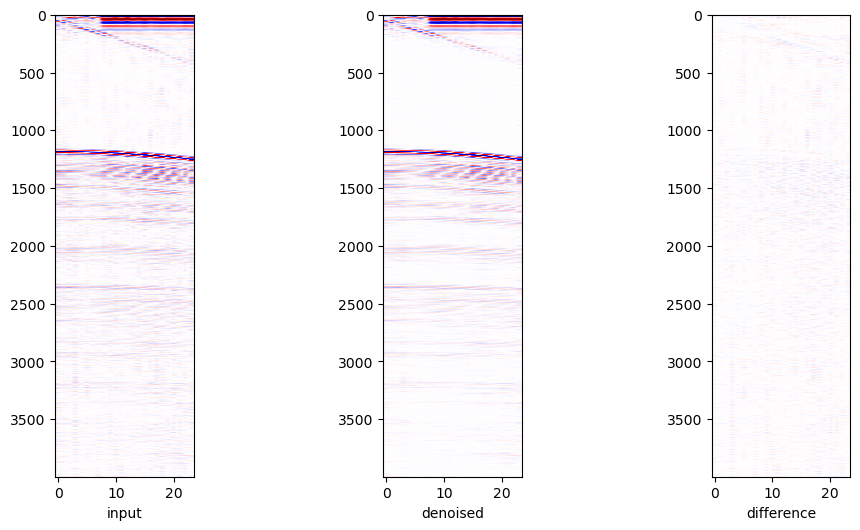

In [7]:
fig = plt.figure(figsize=(12,6))
            
xxx = xxx.transpose()
print(xxx.shape)
ax1 = fig.add_subplot(1,3,1)
ax1.set_xlabel('input')
ax1.imshow(xxx, aspect='0.02', cmap='seismic', vmin=-1.0, vmax=1.0)
            
yyy = yyy.transpose()
ax2 = fig.add_subplot(1,3,2)
ax2.set_xlabel('denoised')
ax2.imshow(yyy,aspect='0.02', cmap='seismic', vmin=-1.0, vmax=1.0)

zzz = zzz.transpose()
ax4 = fig.add_subplot(1,3,3)
ax4.set_xlabel('difference')
ax4.imshow(zzz,aspect='0.02', cmap='seismic', vmin=-1.0, vmax=1.0)

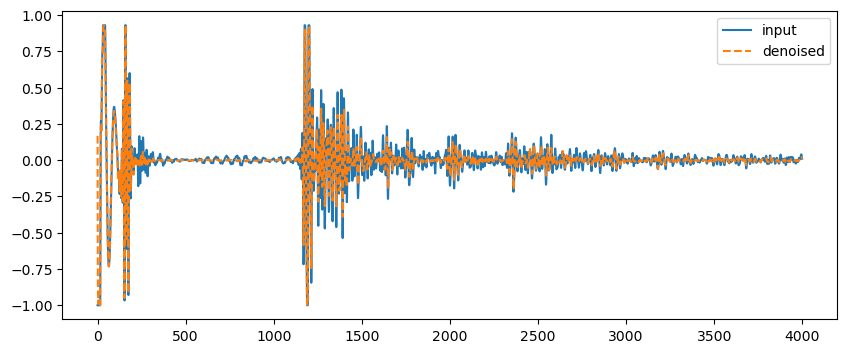

In [8]:
addn_trace = xxx[:,8]
denoise_trace = yyy[:,8]

fig2 = plt.figure(figsize=(10,4))
plt.plot(addn_trace, label='input')
plt.plot(denoise_trace, label='denoised',linestyle='--')
plt.legend()